# Analysis of the error messages and creation of the word embeddings

In [1]:
import nltk
import pandas as pd
import numpy as np
import gensim
import itertools
from collections import Counter

In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [3]:
from nltk.tokenize.treebank import TreebankWordTokenizer #word_tokenize
from nltk.tokenize import word_tokenize

## 1. Read the data and clean up the text

In [4]:
df_msg = pd.read_csv('/eos/user/l/llayer/AIErrorHandling/df_error_msg_exitcodes.csv')

In [5]:
# Tokenize the text
t = TreebankWordTokenizer()
df_msg['tokenized_text'] = df_msg['error_msg'].apply(t.tokenize)

In [8]:
def get_frequencies(df, col_name):
    # Count the word occurences
    str_frequencies = pd.DataFrame(list(Counter(filter(None,list(itertools.chain(*df[col_name]
                                                                            )))).items()),columns=['word','count'])
    return str_frequencies.sort_values(by ='count',ascending=False  )

In [6]:
def get_counts(df, col_name):
    
    # Count the word occurences
    str_frequencies = Counter(filter(None,list(itertools.chain(*df[col_name]))))
    return str_frequencies  

In [9]:
str_frequencies = get_frequencies(df_msg, 'tokenized_text')

In [10]:
str_frequencies.head()

,word,count
46952,:,3035524
179785,>,2436527
113534,<,2343766
211512,--,1980127
526351,",",1918411


In [11]:
minimum_count = 5
low_frequency_words = set(str_frequencies[str_frequencies['count'] < minimum_count]['word'])

In [12]:
# Remove punctuation and kick out words that occur less than a certain threshold
def clean_data(tokens):
    words = filter(lambda word: word not in '``#\'"\'\',--$;:=+><[!@]?{}%(.)""()==========' and word not in low_frequency_words, tokens)
    return words

In [13]:
df_msg['tokenized_text_filtered'] = df_msg['tokenized_text'].apply(clean_data)
#res = test['tokenized_text_filtered'].agg('sum')

In [20]:
tokens = df_msg.iloc[119]
print 'Original message'
print
print tokens["error_msg"]
print
print 'Tokenized'
print
print tokens["tokenized_text"]
print
print 'Filtered'
print
print tokens["tokenized_text_filtered"]

Original message

Adding last 25 lines of CMSSW stdout: Severity    # Occurrences   Total Occurrences --------    -------------   ----------------- Warning             70055               70055 Error                 737                 737 System                 62                  62  dropped waiting message count 2396 TimeReport> Time report complete in 7168.03 seconds  Time Summary:   - Min event:   5.9218  - Max event:   281.226  - Avg event:   25.1797  - Total loop:  6909.67  - Total init:  241.903  - Total job:   7168.03  Event Throughput: 0.27324 ev/s  CPU Summary:   - Total loop:  37704.4  - Total init:  197.907  - Total job:   37918.4  [2018-01-05 02:46:11.996282 +0000][Error  ][AsyncSock         ] [cmsxrootd.fnal.gov:1094 #0.0] Socket error encountered: [ERROR] Invalid operation [2018-01-05 02:46:11.996452 +0000][Error  ][XRootD            ] [cmsxrootd.fnal.gov:1094] Impossible to send message kXR_open (file: /store/mc/RunIIFall17wmLHEGS/ttbb_4FS_ckm_NNPDF31_TuneCP5_amcatnlo_

In [21]:
str_frequencies_filtered = get_frequencies(df_msg, 'tokenized_text_filtered')

In [36]:
str_frequencies_filtered.head()

,word,count
48893,a,543895
26111,n=,511855
35867,/a,511855
21353,i,291329
35861,/i,283349
37860,file,254110
17698,edm,220751
1440,s,193329
8090,0,189721
35873,/s,185714


In [37]:
most_freq = str_frequencies_filtered['word'][0:100]

In [39]:
print list(most_freq)

['a', 'n=', '/a', 'i', '/i', 'file', 'edm', 's', '0', '/s', 'is', '1', 'Total', 'KB/sec', 'of', '&', 'Exception', 'in', 'to', 'Error', 'None', 'error', 'WMException', '...', 'the', 'root', 'CMSSW', 'Message', 'End', 'Adding', 'bytes', 'gsiftp', 'not', 'line', 'avg', 'inst', 'UTC', 'monitor', 'running', 'status', '25', 'job', 'Job', '2', 'last', 'event', 'Traceback', 'ERROR', 'No', 'message', 'ErrorNr', 'LineNumber', 'ClassInstance', 'ClassName', 'FileName', 'MethodName', 'ModuleName', 'lines', 'exception', 'Class', 'Start', '92', 'at', 'stdout', 'from', '///srv/job/WMTaskSpace/cmsRun1/PREMIXRAWoutput.root', 'cmsRun', '__init__', 'const', '18', 'id', 'Calling', 'process', 'Complete', 'Begin', 'code', 'Event', 'data', 'Fatal', '00:00:00', '85', 'open', 'Run', "'FrameworkJobReport.xml", "'PSet.py", "'/bin/bash", "'cmsRun", "'CMSSW", "'arguments", "'scramv1", 'Return', 'CmsRunFailure', 'r', 'pre-events', 'Constructing', 'has', 'c', 'Summary', 'source', 'File']


## 2. Train the word2vec model and visualize with tsne

In [24]:
texts_stemmed = list(df_msg['tokenized_text_filtered'])
w2vmodel_stemmed = gensim.models.Word2Vec(texts_stemmed, size=100, window=5, min_count=5, workers=4)

In [40]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [41]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in most_freq:
        tokens.append(model[word])
        labels.append(word)
    
    print type(word)
    """
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    """

/usr/local/bin/start_ipykernel.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


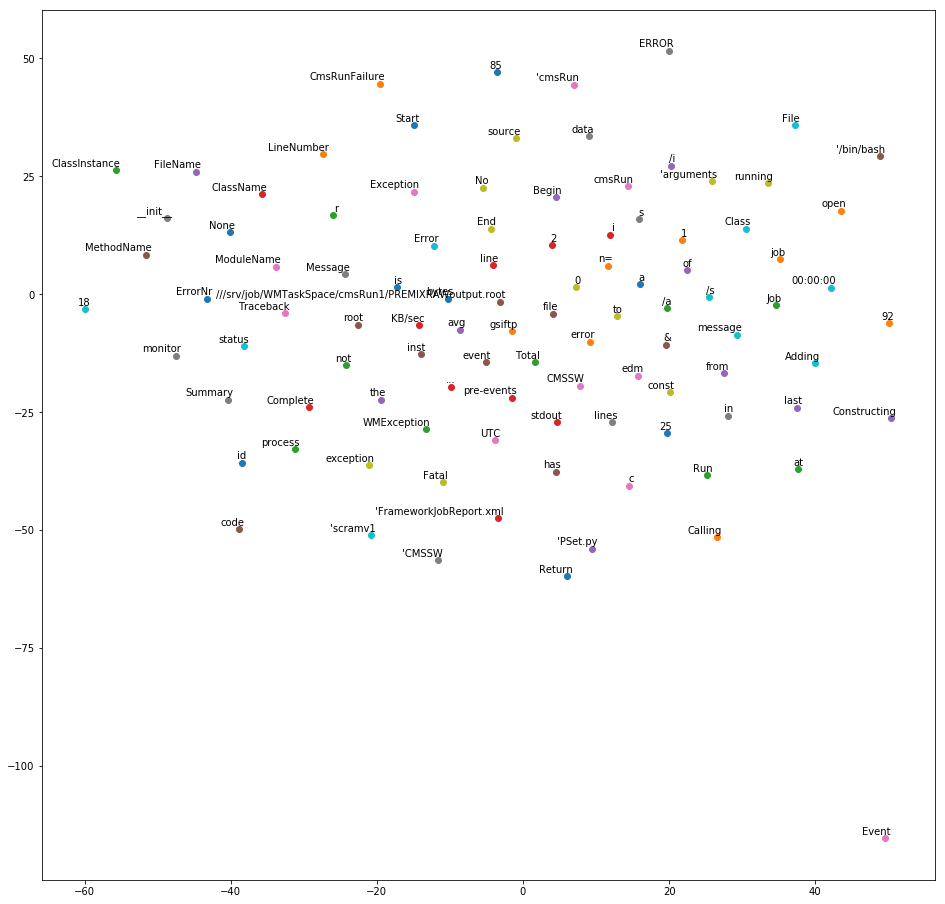

In [42]:
tsne_plot(w2vmodel_stemmed)

In [45]:
def get_average_vector(text):
    return np.mean(np.array([w2vmodel_stemmed.wv[w] for w in text if w in w2vmodel_stemmed]), axis=0)

In [65]:
df_msg['w2v'] = df_msg['tokenized_text_filtered'].apply(get_average_vector)

/usr/local/bin/start_ipykernel.py:2: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if __name__ == '__main__':


In [51]:
type(text_vecs)

pandas.core.series.Series

In [115]:
clone_docs = df_msg[(df_msg['action'] == 'clone')].sample(3000)
acdc_docs = df_msg[(df_msg['action'] == 'acdc')].sample(3000)

In [116]:
test_docs = pd.concat([clone_docs, acdc_docs])

In [117]:
print len(test_docs)

6000


In [118]:
def tsne_plot_classes(model, df):
    "Creates and TSNE model and plots it"
    labels = df['action']
    avg_vec = list(df['w2v'])
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(list(avg_vec))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
    
        if labels.iloc[i] == 'acdc':
            plt.scatter(x[i],y[i], c='red')
        else:
            plt.scatter(x[i],y[i], c='blue')
        
    """    
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    """   
    plt.show()
    

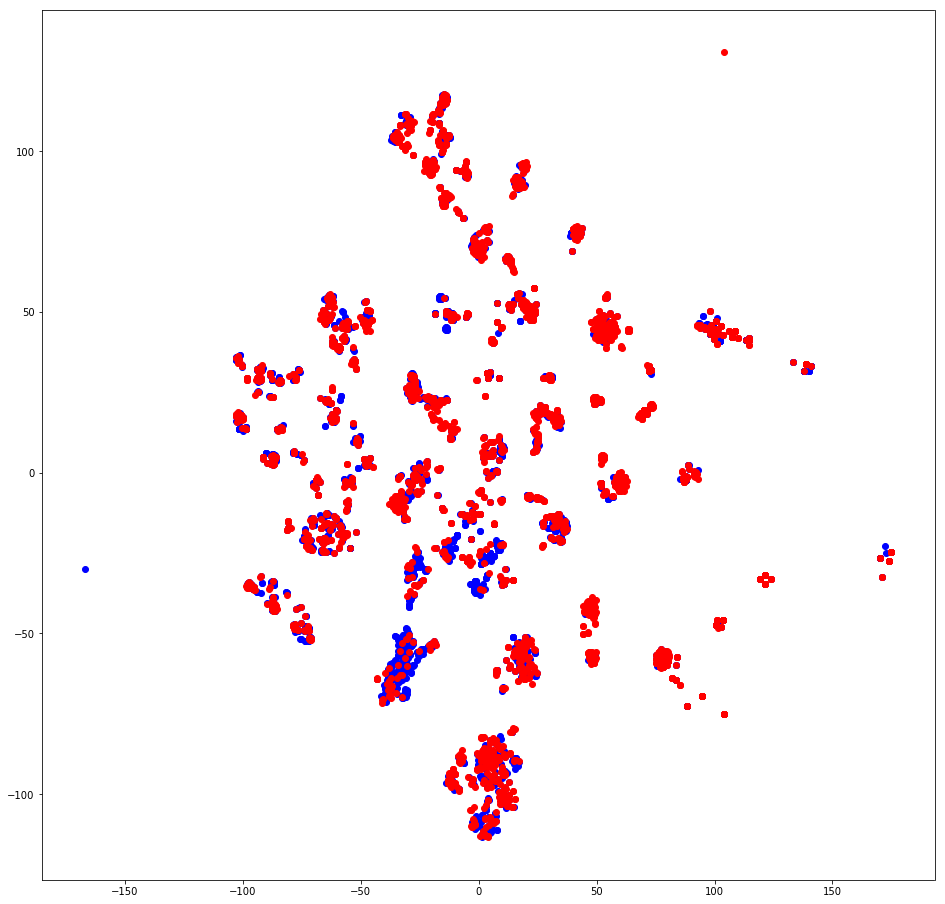

In [119]:
tsne_plot_classes(w2vmodel_stemmed, test_docs)

## 3. Plot the wordcloud

In [27]:
counts = get_counts(df_msg, 'tokenized_text_filtered')

In [28]:
type(counts)

collections.Counter

In [29]:
import wordcloud
import matplotlib.pyplot as plt

In [30]:
wc = wordcloud.WordCloud(max_words=100, background_color="black", width=800, height=400).generate_from_frequencies(counts)

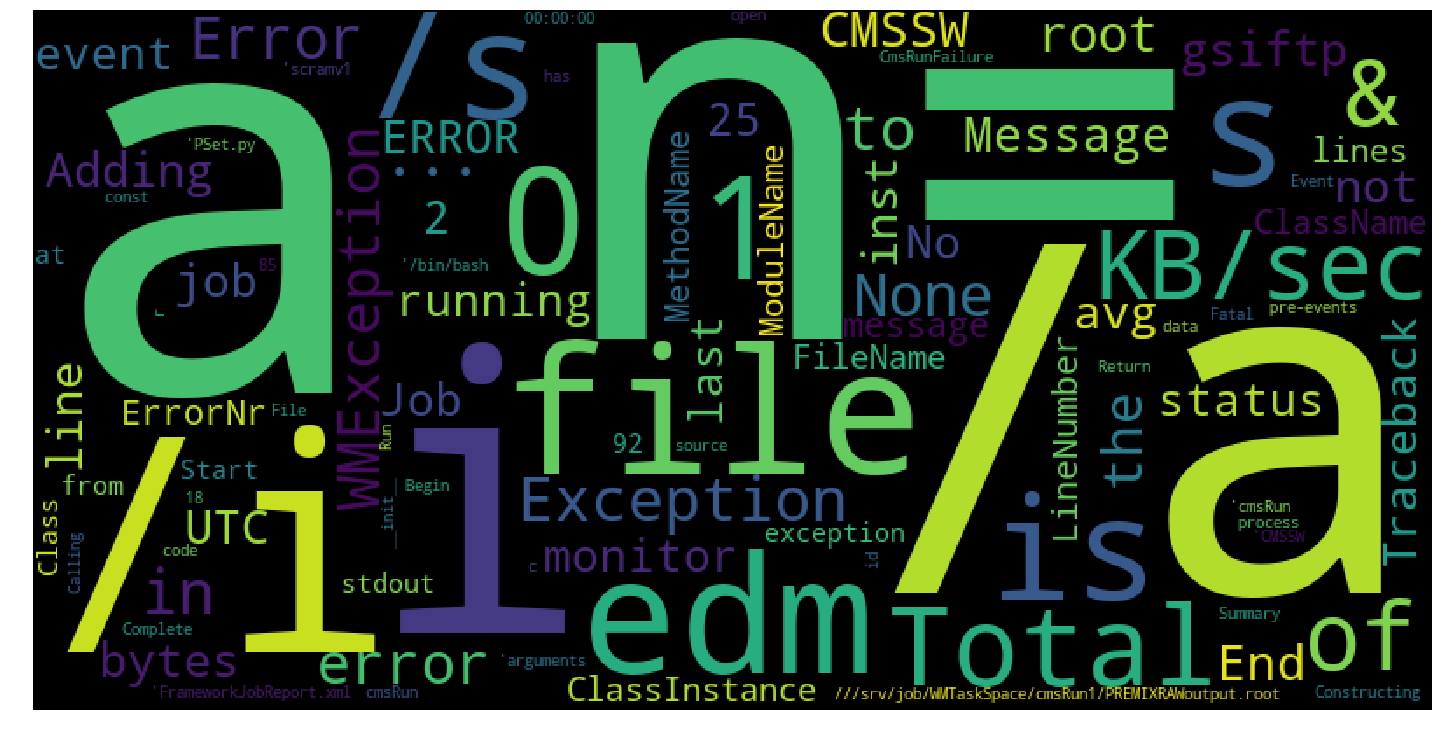

In [33]:
# plot the WordCloud image   
plt.figure( figsize=(20,10) )
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 